Optimal hyperplane: 0.5000000000000001*x1 + 0.0*x2 + -1.0 = 0
Support vectors:
[[ 1  0]
 [ 0 -1]
 [ 4  1]
 [ 4 -1]]


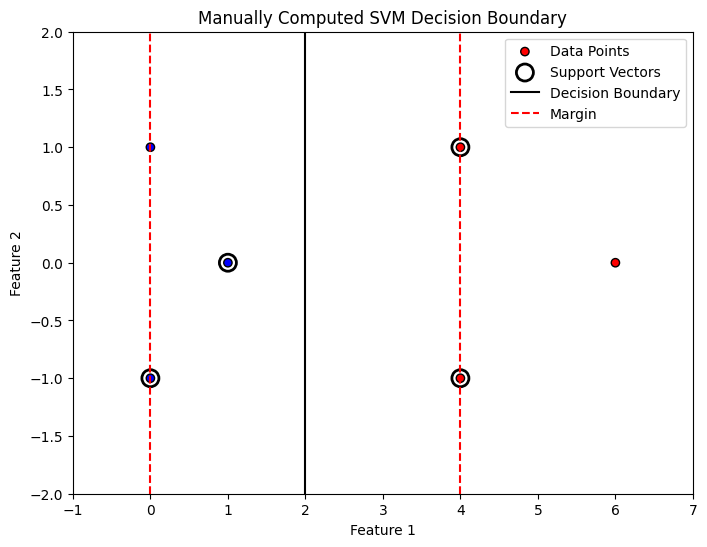

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def find_hyperplane(X, y):
    svm = SVC(kernel='linear', C=0.1)
    svm.fit(X, y)
    
    w = svm.coef_[0]
    b = svm.intercept_[0]
    support_vectors = X[svm.support_]
    
    return w, b, support_vectors

def plot_svm(X, y, w, b, support_vectors):
    plt.figure(figsize=(8, 6))
    
    # Plot all data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', label='Data Points')
    
    # Highlight support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, facecolors='none', edgecolors='k', linewidths=2, label='Support Vectors')
    
    x_min, x_max = min(X[:, 0]) - 1, max(X[:, 0]) + 1
    y_min, y_max = min(X[:, 1]) - 1, max(X[:, 1]) + 1
    
    # Handle vertical decision boundary case (w[1] = 0)
    if w[1] == 0:
        x_decision = -b / w[0]
        plt.axvline(x=x_decision, color='k', linestyle='-', label='Decision Boundary')
        plt.axvline(x=x_decision + 1/w[0], color='r', linestyle='--', label='Margin')
        plt.axvline(x=x_decision - 1/w[0], color='r', linestyle='--')
    else:
        # Normal case where decision boundary exists in (x, y) space
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = (-b - w[0] * x_vals) / w[1]  # Decision boundary equation
        margin1 = (-b + 1 - w[0] * x_vals) / w[1]
        margin2 = (-b - 1 - w[0] * x_vals) / w[1]
        plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
        plt.plot(x_vals, margin1, 'r--', label='Margin')
        plt.plot(x_vals, margin2, 'r--')
    
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Manually Computed SVM Decision Boundary')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

w, b, support_vectors = find_hyperplane(X, y)
print(f"Optimal hyperplane: {w[0]}*x1 + {w[1]}*x2 + {b} = 0")
print("Support vectors:")
print(support_vectors)

plot_svm(X, y, w, b, support_vectors)
